# Birthday paradox

**Problem 1a.** During exercise session, we showed that for $d$ equally likely dates in a year and $n$ people, the probability of a repeat date is $p(n)=1-\frac{d^\underline{n}}{d^n}$. We also derived a simple approximate formula for this probability: $p_a(n) = 1-e^{-\frac{n(n-1)}{2d}}$. In particular, this approximation implies that for $d=365$ dates, $p(n)$ is close to $\frac{1}{2}$ for $n=23$.

Verify how good the approximation is. To this end, write a program that computes the exact value of $p(n)$ as well as the value of the approximation $p_a(n)$ for $d=365$ and $n=1,\ldots,60$. Plot the graphs of the two functions.

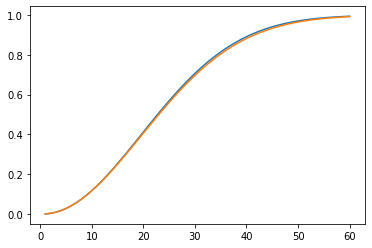

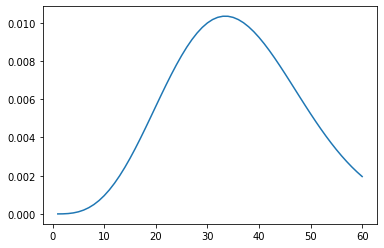

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from math import exp

def ff(d, n):
    result = 1
    while n > 0:
        result = result * d
        d = d - 1
        n = n - 1
    return result


def fac(n):
    return ff(n, n)


def p(number_od_dates, number_of_people):
    return float(1) - (float(ff(number_od_dates, number_of_people))/float(number_od_dates**number_of_people))


def pa(number_od_dates, number_of_people):
    n = number_of_people
    return float(1) - exp(-(ff(n, 2)/(2 * number_od_dates)))


DAYS_IN_YEAR = 365

lx = range(1, 61)
ly = [p(DAYS_IN_YEAR, i) for i in lx]
lyapprox = [pa(DAYS_IN_YEAR, i) for i in lx]
ldiff = [ly[i]-lyapprox[i] for i in range(60)]

plt.figure(1)
plt.plot(lx, ly)
plt.plot(lx, lyapprox)
plt.figure(2)
plt.plot(lx, ldiff)

plt.show()

**Problem 1b.**
Implement a function, that chooses random dates out of $1,\ldots,d$ until a repeat occurs. The function should return the number of the step in which that happened. Run the function $N=100\,000$ times. 
    * Plot a histogram of the return values.
    * Which return value seems most likely? 
    * What is the average of the return values?
    * Is there any simple relation between these two numbers and the value $23$ in the previous problem?
    * Is there any simple relation between the histogram obtained, and the plot in the previous problem?

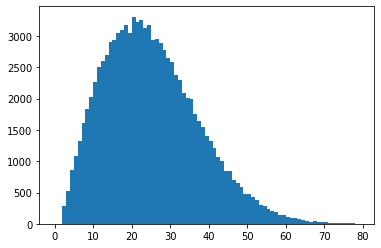

In [2]:
import random as rnd
from statistics import mean, median
from scipy.stats import norm


def random_dates(range_limit, random_function=rnd.randint):
    d = range_limit
    result = set()
    while True:
        temp = random_function(1, d)
        if temp in result:
            break
        else:
            result.add(temp)
    return len(result) + 1

bins = range(80)
NUMBER_OF_SAMPLES = 100000

results = []
for i in range(NUMBER_OF_SAMPLES):
    results.append(random_dates(DAYS_IN_YEAR))
    
(mu, sigma) = norm.fit(results)
    
plt.figure(3)
n, _, patches = plt.hist(results, bins)
data_fit = norm.pdf(bins, mu, sigma)
# plt.plot(bins, data_fit, 'r--', linewidth = 2)
plt.show()

In [3]:
print("avg = " + str(mean(results)))
print("median = " + str(median(results)))

avg = 24.60442
median = 23.0


**Problem 1c.** Here we investigate how our analysis using the classical approach compares to a more empirical one. The file *us_births_69_88.csv* contains the counts for birthdates from 1969 to 1988. Only those births, for which the full date is known, are included in the file.
    * Read the file.
    * Investigate the data. Do you notice anything strange?
    * Plot a heatmap of the data. Do you notice any significant deviations from the uniform assumption? Can you explain them?
    * Implement a sampling function as in 1b, but this time using the supplied data. Compare the results.

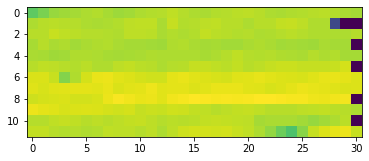

In [8]:
import numpy as np

data = np.loadtxt('us_births_69_88.csv', skiprows=1, delimiter=',', dtype=int)

hist_data = [[0 for x in range(31)] for y in range(12)]
for i in range(len(data)):
    row = data[i]
    try:
        hist_data[row[0]-1][row[1]-1] = row[2]
    except:
        print(row)
   
plt.figure(4)
plt.imshow(hist_data)
plt.show()

31.55375729999969


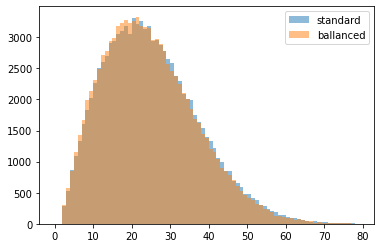

In [9]:
from itertools import accumulate
from bisect import bisect_left, bisect_right
import timeit as tit

values = list(map(lambda arr: arr[2], data))
prefix_sums = list(accumulate(values)) # numpy.cumsum


def ballanced_rand_function(prefix_sums, rand_low_range, rand_high_range):
    max_sum = prefix_sums[-1]
    ball_result = rnd.randint(0, max_sum-1)
    index = bisect_left(prefix_sums, ball_result)
    result = rand_low_range + int(float(rand_high_range-rand_low_range) / float(len(prefix_sums)-1) * float(index))
    return result
    
    
def ballanced_data_function(rand_low_range, rand_high_range):
    return ballanced_rand_function(prefix_sums, rand_low_range, rand_high_range)

start_time = tit.default_timer()
results_ball = []
for i in range(NUMBER_OF_SAMPLES):
    results_ball.append(random_dates(DAYS_IN_YEAR, random_function=ballanced_data_function))
print(tit.default_timer() - start_time)
    
plt.figure(5)
plt.hist(results, bins, alpha=0.5, label='standard')
plt.hist(results_ball, bins, alpha=0.5, label='ballanced')
plt.legend(loc='upper right')
plt.show()


In [6]:
print("avg = " + str(mean(results_ball)))
print("median = " + str(median(results_ball)))

avg = 24.19208
median = 23.0
